**Group 55**


Shalin Patel, Ankuran Chattoraj, Venkata Nithya Ala

#Task 1

In [4]:
!pip install ts2vg
!pip install igraph
from ts2vg import HorizontalVG, NaturalVG
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Mounting Google drive to import our dataset** 

Note: Please upload the dataset provided (Project_2) on your google drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Here we have used nested loop to globally declare dataframes for each Subject, activity and accelerometer signal and load the respective csv data.**

In [6]:
subjects = ['Subject_'+str(i) for i in range(1,16)]

signalactivity = ['walking','running','climbingup','climbingdown']

for p in subjects:
    #filepath = 'E:/OneDrive - Northeastern University/NEU/Courses/FDA/Module 4/Project 2/Data/' + p
    filepath = '/content/drive/MyDrive/Project_2/' + p
    for a in signalactivity:
      chest = p + '_acc_' + a + '_chest'
      head = p + '_acc_' + a + '_head'
      filechest = filepath + '/acc_' + a + '_chest.csv'
      filehead = filepath + '/acc_' + a + '_head.csv'
      
      globals()['%s' % chest] = pd.read_csv(filechest)
      globals()['%s' % head] = pd.read_csv(filehead)   

In [7]:
head, chest, filehead

('Subject_15_acc_climbingdown_head',
 'Subject_15_acc_climbingdown_chest',
 '/content/drive/MyDrive/Project_2/Subject_15/acc_climbingdown_head.csv')

**Creating custom functions to calculate Average degree, Network diameter, Average path lengths using Horizontal Visibility Graph and Natural Visibility Graph methods for each Subject, activity and accelerometer signal. We also define a function to store the calculated values in a tabular format.**

In [8]:
# function for Horizontal Visibility Graph method

def HVG(data, subject, activity, sl):

  dfTemp = pd.DataFrame(columns=['Method', 'Subject', 'Accelerometer_Axis','Average_Degree','Network_Diameter','Average_Path_Length',
                                 'Activity','Sensor_Location'])
  g = HorizontalVG()
  col = 'attr_x'
  Ax = 'X'
  for i in range(3):
    if(i==1):
      col = 'attr_y'
      Ax = 'Y'
    if(i==2):
      col = 'attr_z'
      Ax = 'Z'

    g.build(data[col][1000:2024])
    ig_g = g.as_igraph()
    dfTemp.loc[len(dfTemp)] = ['HVG', subject, Ax, np.mean(ig_g.degree()), ig_g.diameter(), ig_g.average_path_length(), activity, sl]
    
  return dfTemp

# function for Natural Visibility Graph method

def NVG(data, subject, activity, sl):

  dfTemp = pd.DataFrame(columns=['Method', 'Subject', 'Accelerometer_Axis','Average_Degree','Network_Diameter','Average_Path_Length',
                                 'Activity','Sensor_Location'])
  g = NaturalVG()
  col = 'attr_x'
  Ax = 'X'
  for i in range(3):
    if(i==1):
      col = 'attr_y'
      Ax = 'Y'
    if(i==2):
      col = 'attr_z'
      Ax = 'Z'

    g.build(data[col][1000:2024])
    ig_g = g.as_igraph()
    dfTemp.loc[len(dfTemp)] = ['NVG', subject, Ax, np.mean(ig_g.degree()), ig_g.diameter(), ig_g.average_path_length(), activity, sl]
    
  return dfTemp

# func to join and return the calculated metrics from HVG and NVG

def tabularResults(df, data, subject, activity, sl):
  df1 = HVG(data, subject, activity, sl)
  df2 = NVG(data, subject, activity, sl)
  df = pd.concat([df, df1, df2], axis=0)
  
  return df

**Below we run the custom functions for all Subject, activity and accelerometer signal and store in dataframe.**

Runtime: 1min 12sec approx

In [9]:
df = pd.DataFrame(columns=['Method', 'Subject', 'Accelerometer_Axis','Average_Degree','Network_Diameter','Average_Path_Length','Activity','Sensor_Location'])

for p in subjects:
    for a in signalactivity:
      chest = p + '_acc_' + a + '_chest'
      head = p + '_acc_' + a + '_head'
      df = tabularResults(df, globals()[chest], p , a, 'chest')
      df = tabularResults(df, globals()[head], p , a, 'head')

df = df.reset_index(drop = True)

**Tabular results as below:**

In [22]:
dfinal = df.copy()


**Droping Sensor_location column and Renaming subjects and activity values to create final dataframe as required.**

In [11]:

subjectdict= {'Subject_1': 1, 'Subject_2': 2, 'Subject_3': 3, 'Subject_4': 4,'Subject_5': 5, 'Subject_6': 6, 'Subject_7': 7, 'Subject_8': 8,'Subject_9': 9, 'Subject_10': 10, 'Subject_11': 11, 'Subject_12': 12,'Subject_13': 13, 'Subject_14': 14, 'Subject_15': 15}
activitydict= {'walking': 'Walking','running': 'Running','climbingup': 'Climbing Up','climbingdown': 'Climbing Down'}
dfinal['Subject'].replace(subjectdict, inplace=True)
dfinal['Activity'].replace(activitydict, inplace=True)
dfinal= dfinal.drop(['Sensor_Location'], axis= 1)
dfinal

,Method,Subject,Accelerometer_Axis,Average_Degree,Network_Diameter,Average_Path_Length,Activity
0,HVG,1,X,3.958984,26,11.578024,Walking
1,HVG,1,Y,3.951172,22,10.666252,Walking
2,HVG,1,Z,3.957031,23,10.602296,Walking
3,NVG,1,X,11.451172,10,4.441492,Walking
4,NVG,1,Y,11.986328,9,4.241050,Walking
...,...,...,...,...,...,...,...
715,HVG,15,Y,3.939453,34,14.328954,Climbing Down
716,HVG,15,Z,3.939453,39,16.957489,Climbing Down
717,NVG,15,X,8.044922,10,5.092977,Climbing Down
718,NVG,15,Y,14.203125,11,4.388028,Climbing Down


**Creating new dataframes for only Walking and Running activity**

In [12]:
dfWR = df[df['Activity'].isin(['Walking','Running'])]
dfWalkRun = dfinal[dfinal['Activity'].isin(['Walking','Running'])]
dfWalkRunHVG = dfWalkRun[dfWalkRun['Method'].isin(['HVG'])]
dfWalkRunNVG = dfWalkRun[dfWalkRun['Method'].isin(['NVG'])]
dfWalkRunHVGX = dfWalkRunHVG[dfWalkRunHVG['Accelerometer_Axis'].isin(['X'])]
dfWalkRunHVGY = dfWalkRunHVG[dfWalkRunHVG['Accelerometer_Axis'].isin(['Y'])]
dfWalkRunHVGZ = dfWalkRunHVG[dfWalkRunHVG['Accelerometer_Axis'].isin(['Z'])]
dfWalkRunNVGX = dfWalkRunNVG[dfWalkRunNVG['Accelerometer_Axis'].isin(['X'])]
dfWalkRunNVGY = dfWalkRunNVG[dfWalkRunNVG['Accelerometer_Axis'].isin(['Y'])]
dfWalkRunNVGZ = dfWalkRunNVG[dfWalkRunNVG['Accelerometer_Axis'].isin(['Z'])]

dfWalkRunHVGX

,Method,Subject,Accelerometer_Axis,Average_Degree,Network_Diameter,Average_Path_Length,Activity
0,HVG,1,X,3.958984,26,11.578024,Walking
6,HVG,1,X,3.949219,35,16.403747,Walking
12,HVG,1,X,3.962891,22,7.543843,Running
18,HVG,1,X,3.953125,31,10.856393,Running
48,HVG,2,X,3.943359,26,10.552521,Walking
54,HVG,2,X,3.949219,25,9.147853,Walking
60,HVG,2,X,3.960938,21,8.862075,Running
66,HVG,2,X,3.941406,30,11.693623,Running
96,HVG,3,X,3.955078,27,12.852334,Walking
102,HVG,3,X,3.945312,37,15.984902,Walking


**Creating new dataframes for only Climbing up and Climbing down activity**

In [13]:
dfCUD = df[df['Activity'].isin(['Climbing Up','Climbing Down'])]
dfClimbUpDown = dfinal[dfinal['Activity'].isin(['Climbing Up','Climbing Down'])]
dfClimbUpDownHVG = dfClimbUpDown[dfClimbUpDown['Method'].isin(['HVG'])]
dfClimbUpDownNVG = dfClimbUpDown[dfClimbUpDown['Method'].isin(['NVG'])]
dfClimbUpDownHVGX = dfClimbUpDownHVG[dfClimbUpDownHVG['Accelerometer_Axis'].isin(['X'])]
dfClimbUpDownHVGY = dfClimbUpDownHVG[dfClimbUpDownHVG['Accelerometer_Axis'].isin(['Y'])]
dfClimbUpDownHVGZ = dfClimbUpDownHVG[dfClimbUpDownHVG['Accelerometer_Axis'].isin(['Z'])]
dfClimbUpDownNVGX = dfClimbUpDownNVG[dfClimbUpDownNVG['Accelerometer_Axis'].isin(['X'])]
dfClimbUpDownNVGY = dfClimbUpDownNVG[dfClimbUpDownNVG['Accelerometer_Axis'].isin(['Y'])]
dfClimbUpDownNVGZ = dfClimbUpDownNVG[dfClimbUpDownNVG['Accelerometer_Axis'].isin(['Z'])]
dfClimbUpDownHVG

,Method,Subject,Accelerometer_Axis,Average_Degree,Network_Diameter,Average_Path_Length,Activity
24,HVG,1,X,3.957031,35,15.409904,Climbing Up
25,HVG,1,Y,3.951172,33,14.384512,Climbing Up
26,HVG,1,Z,3.953125,30,11.056442,Climbing Up
30,HVG,1,X,3.943359,38,16.030484,Climbing Up
31,HVG,1,Y,3.935547,36,13.605383,Climbing Up
...,...,...,...,...,...,...,...
709,HVG,15,Y,3.941406,31,13.582100,Climbing Down
710,HVG,15,Z,3.941406,32,11.783465,Climbing Down
714,HVG,15,X,3.953125,28,12.069881,Climbing Down
715,HVG,15,Y,3.939453,34,14.328954,Climbing Down


**Scatter plot for Average degree vs Network diameter calculated using Horizontal Visibility method for Walking and Running Activity**

[Text(0.5, 1.0, 'Horizontal Visibility Graph Method')]

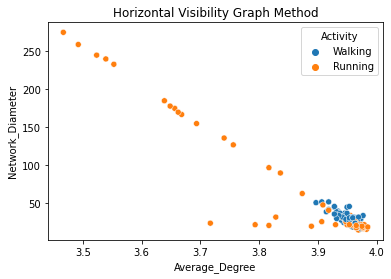

In [14]:
sn.scatterplot(x = dfWalkRunHVG['Average_Degree'], y = dfWalkRunHVG['Network_Diameter'], data= dfWalkRunHVG, hue = dfWalkRunHVG['Activity']).set(title='Horizontal Visibility Graph Method')

**Scatter plot for Average degree vs Network diameter calculated using Horizontal Visibility method for Walking and Running Activity**

**For each Accelerometer axis**

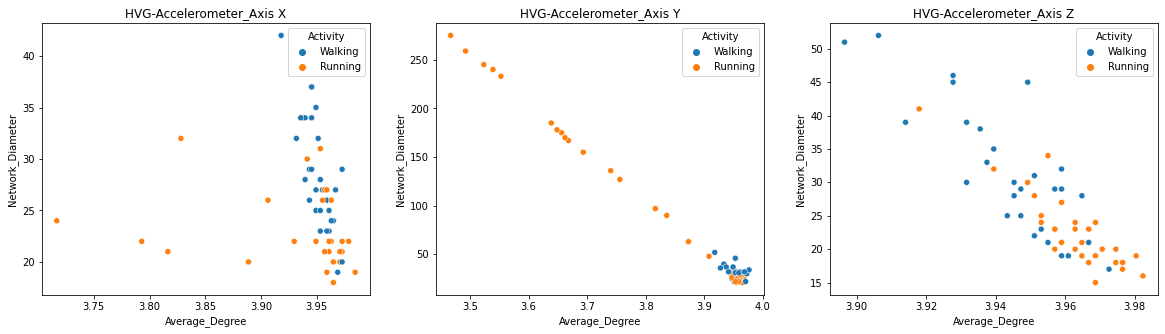

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sn.scatterplot(x = dfWalkRunHVGX['Average_Degree'], y = dfWalkRunHVGX['Network_Diameter'], data= dfWalkRunHVGX, hue = dfWalkRunHVGX['Activity'],ax=axes[0]).set(title='HVG-Accelerometer_Axis X')
sn.scatterplot(x = dfWalkRunHVGY['Average_Degree'], y = dfWalkRunHVGY['Network_Diameter'], data= dfWalkRunHVGY, hue = dfWalkRunHVGY['Activity'],ax=axes[1]).set(title='HVG-Accelerometer_Axis Y')
sn.scatterplot(x = dfWalkRunHVGZ['Average_Degree'], y = dfWalkRunHVGZ['Network_Diameter'], data= dfWalkRunHVGZ, hue = dfWalkRunHVGZ['Activity'],ax=axes[2]).set(title='HVG-Accelerometer_Axis Z')
plt.show()

**Scatter plot for Average degree vs Network diameter calculated using Natural Visibility method for Walking and Running Activity**

[Text(0.5, 1.0, 'Natural Visibility Graph Method')]

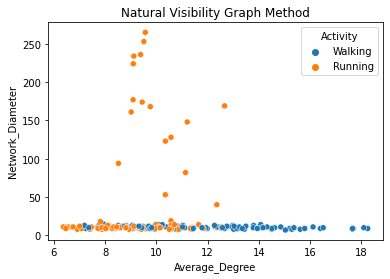

In [16]:
sn.scatterplot(x = dfWalkRunNVG['Average_Degree'], y = dfWalkRunNVG['Network_Diameter'], data= dfWalkRunNVG, hue = dfWalkRunNVG['Activity']).set(title='Natural Visibility Graph Method')

**Scatter plot for Average degree vs Network diameter calculated using Natural Visibility method for Walking and Running Activity**

**For each Accelerometer axis**

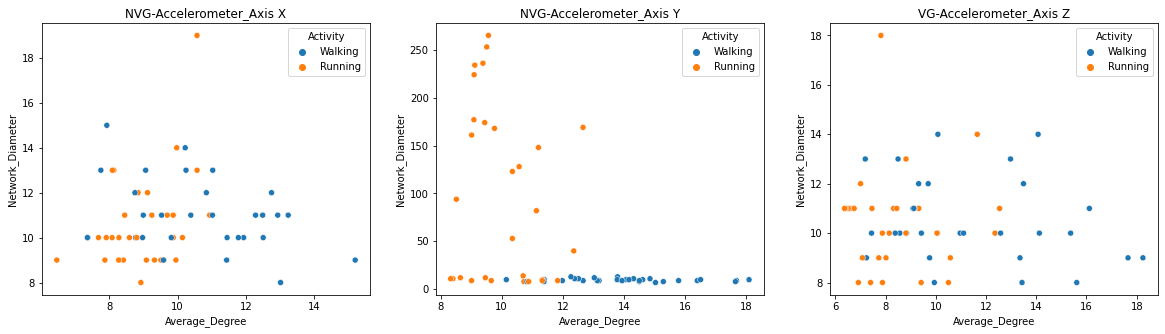

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sn.scatterplot(x = dfWalkRunNVGX['Average_Degree'], y = dfWalkRunNVGX['Network_Diameter'], data= dfWalkRunNVGX, hue = dfWalkRunNVGX['Activity'],ax=axes[0]).set(title='NVG-Accelerometer_Axis X')
sn.scatterplot(x = dfWalkRunNVGY['Average_Degree'], y = dfWalkRunNVGY['Network_Diameter'], data= dfWalkRunNVGY, hue = dfWalkRunNVGY['Activity'],ax=axes[1]).set(title='NVG-Accelerometer_Axis Y')
sn.scatterplot(x = dfWalkRunNVGZ['Average_Degree'], y = dfWalkRunNVGZ['Network_Diameter'], data= dfWalkRunNVGZ, hue = dfWalkRunNVGZ['Activity'],ax=axes[2]).set(title='VG-Accelerometer_Axis Z')
plt.show()

**Scatter plot for Average degree vs Network diameter calculated using Horizontal Visibility method for Climbing Up and Climbing Down Activity**

[Text(0.5, 1.0, 'Horizontal Visibility Graph Method')]

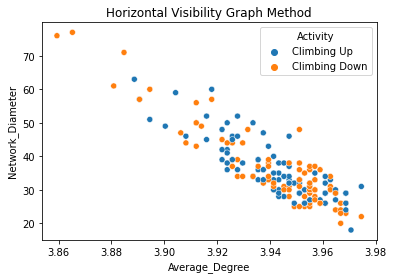

In [18]:
sn.scatterplot(x = dfClimbUpDownHVG['Average_Degree'], y = dfClimbUpDownHVG['Network_Diameter'], data= dfClimbUpDownHVG, hue = dfClimbUpDownHVG['Activity']).set(title='Horizontal Visibility Graph Method')

**Scatter plot for Average degree vs Network diameter calculated using Horizontal Visibility method for Climbing up and Climbing down Activity**

**For each Accelerometer axis**

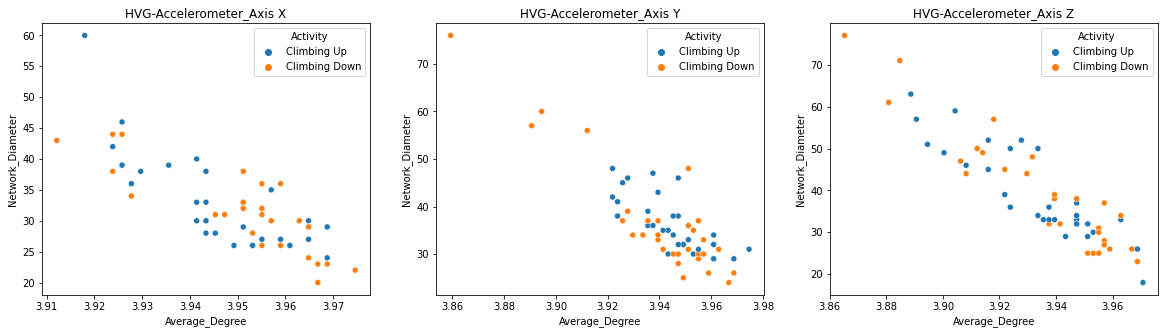

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sn.scatterplot(x = dfClimbUpDownHVGX['Average_Degree'], y = dfClimbUpDownHVGX['Network_Diameter'], data= dfClimbUpDownHVGX, hue = dfClimbUpDownHVGX['Activity'],ax=axes[0]).set(title='HVG-Accelerometer_Axis X')
sn.scatterplot(x = dfClimbUpDownHVGY['Average_Degree'], y = dfClimbUpDownHVGY['Network_Diameter'], data= dfClimbUpDownHVGY, hue = dfClimbUpDownHVGY['Activity'],ax=axes[1]).set(title='HVG-Accelerometer_Axis Y')
sn.scatterplot(x = dfClimbUpDownHVGZ['Average_Degree'], y = dfClimbUpDownHVGZ['Network_Diameter'], data= dfClimbUpDownHVGZ, hue = dfClimbUpDownHVGZ['Activity'],ax=axes[2]).set(title='HVG-Accelerometer_Axis Z')
plt.show()

**Scatter plot for Average degree vs Network diameter calculated using Natural Visibility method for Climbing Up and Climbing Down Activity**

[Text(0.5, 1.0, 'Natural Visibility Graph Method')]

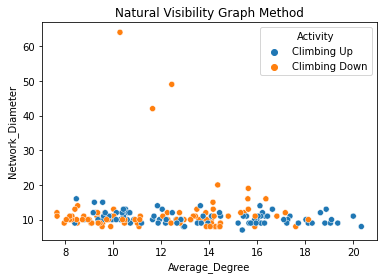

In [20]:
sn.scatterplot(x = dfClimbUpDownNVG['Average_Degree'], y = dfClimbUpDownNVG['Network_Diameter'], data= dfClimbUpDownNVG, hue = dfClimbUpDownNVG['Activity']).set(title='Natural Visibility Graph Method')

**Scatter plot for Average degree vs Network diameter calculated using Natural Visibility method for Climbing up and Climbing down Activity**

**For each Accelerometer axis**

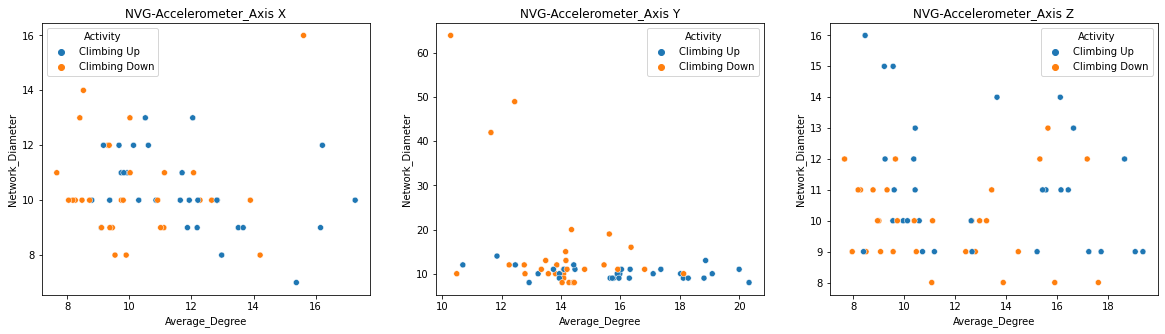

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sn.scatterplot(x = dfClimbUpDownNVGX['Average_Degree'], y = dfClimbUpDownNVGX['Network_Diameter'], data= dfClimbUpDownNVGX, hue = dfClimbUpDownNVGX['Activity'],ax=axes[0]).set(title='NVG-Accelerometer_Axis X')
sn.scatterplot(x = dfClimbUpDownNVGY['Average_Degree'], y = dfClimbUpDownNVGY['Network_Diameter'], data= dfClimbUpDownNVGY, hue = dfClimbUpDownNVGY['Activity'],ax=axes[1]).set(title='NVG-Accelerometer_Axis Y')
sn.scatterplot(x = dfClimbUpDownNVGZ['Average_Degree'], y = dfClimbUpDownNVGZ['Network_Diameter'], data= dfClimbUpDownNVGZ, hue = dfClimbUpDownNVGZ['Activity'],ax=axes[2]).set(title='NVG-Accelerometer_Axis Z')
plt.show()

# Task 2

**Functions to calculate shannon entropy, ordinal_patterns, permutation entropy and complexity**

In [23]:
def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return (Comp_JS)

**Running the functions of permutation entropy and complexity by varing parameters like Accelerometer placement (Chest, head), Activity (Walking, running, climbing up, climbing down), delay (1,2,3), Dimension (3,4,5,6), Signal length (1024,2048,4096) and axis (X, Y, Z) and capturing results in List**

In [24]:
Results = [(int(key.split('_')[1]),c.split('_')[-1].upper(),k,i,j,
            p_entropy(ordinal_patterns(globals()[key][c][:k], i, j)), 
            complexity(ordinal_patterns(globals()[key][c][:k], i, j)),
            key.split('_')[-2],key.split('_')[-1])
            for i in range(3,7) for j in range(1,4) for k in [1024,2048,4096] for key in globals().keys() for c in ['attr_x', 'attr_y', 'attr_z']
            if 'Subject' in key ]

**Copying results into dataframe**

In [25]:
df_Results = pd.DataFrame(Results, columns=['Subject','Accelerometer axis', 'Signal length', 'Dimension','Delay',
                               'Permutation entropy','Complexity','Activity','Body Part'])

In [26]:
df_Results

,Subject,Accelerometer axis,Signal length,Dimension,Delay,Permutation entropy,Complexity,Activity,Body Part
0,1,X,1024,3,1,0.855987,0.119191,walking,chest
1,1,Y,1024,3,1,0.816343,0.145361,walking,chest
2,1,Z,1024,3,1,0.913619,0.075973,walking,chest
3,1,X,1024,3,1,0.775745,0.171051,walking,head
4,1,Y,1024,3,1,0.878394,0.102163,walking,head
...,...,...,...,...,...,...,...,...,...
12955,15,Y,4096,6,3,0.947647,0.113763,climbingdown,chest
12956,15,Z,4096,6,3,0.962741,0.085106,climbingdown,chest
12957,15,X,4096,6,3,0.951858,0.102568,climbingdown,head
12958,15,Y,4096,6,3,0.889352,0.198386,climbingdown,head


**Scatter plot for Permutation Entropy vs Complexity for Walking and Running activity**

[Text(0.5, 1.0, 'Permutation Entropy vs Complexity')]

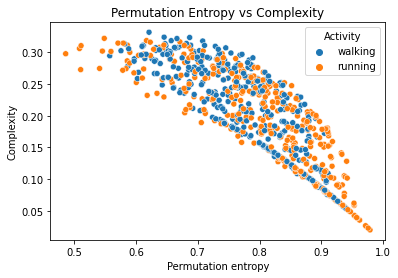

In [27]:
data = df_Results[([(x in ['walking', 'running']) for x in df_Results.Activity ]) & 
           (df_Results['Signal length'] == 4096) & (df_Results['Delay'] == 1)]
sn.scatterplot(
                x = 'Permutation entropy',
                y = 'Complexity',
                data = data,
                hue = 'Activity'
            ).set(title = "Permutation Entropy vs Complexity")

**Scatter plot for Permutation Entropy vs Complexity for Climbing Up and Climbing down activity**

[Text(0.5, 1.0, 'Permutation Entropy vs Complexity')]

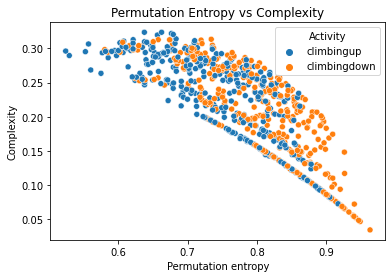

In [28]:
data = df_Results[([(x in ['climbingup', 'climbingdown']) for x in df_Results.Activity ]) & 
           (df_Results['Signal length'] == 4096) & (df_Results['Delay'] == 1)]
sn.scatterplot(
                x = 'Permutation entropy',
                y = 'Complexity',
                data = data,
                hue = 'Activity'
            ).set(title='Permutation Entropy vs Complexity')